In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Invariance Under Changes in Scale

Number of keypoint normal image: 385
Number of keypoint scale 0.2: 42
Number of keypoint scale 0.5: 130
Number of keypoint scale 0.8: 305
Number of keypoint scale 1.25: 675
Number of keypoint scale 2.0: 1060
Number of keypoint scale 5.0: 135


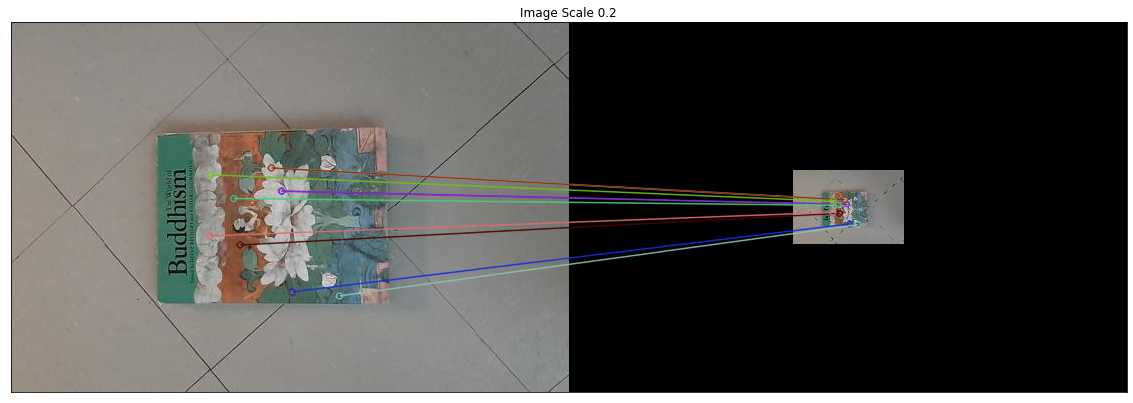

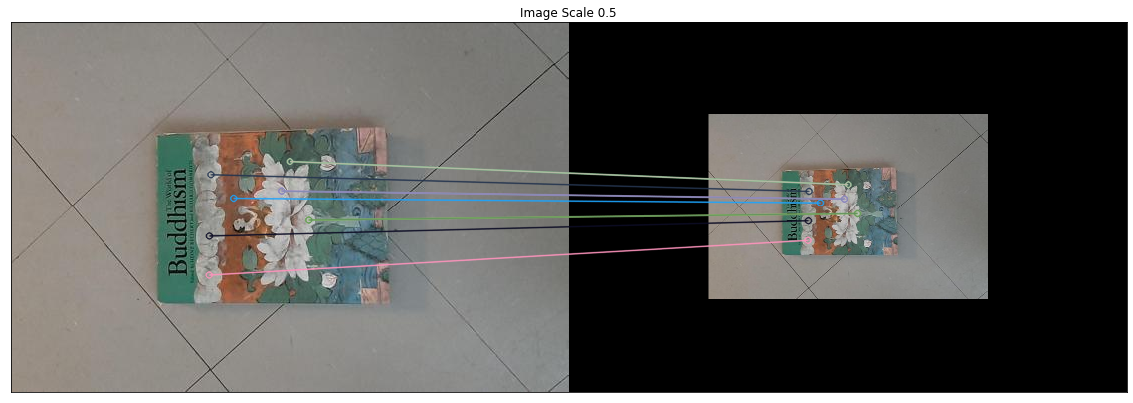

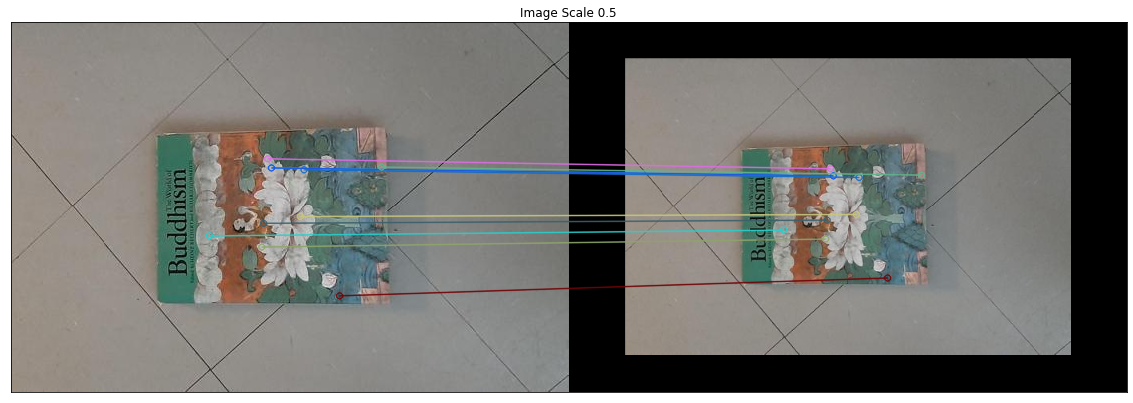

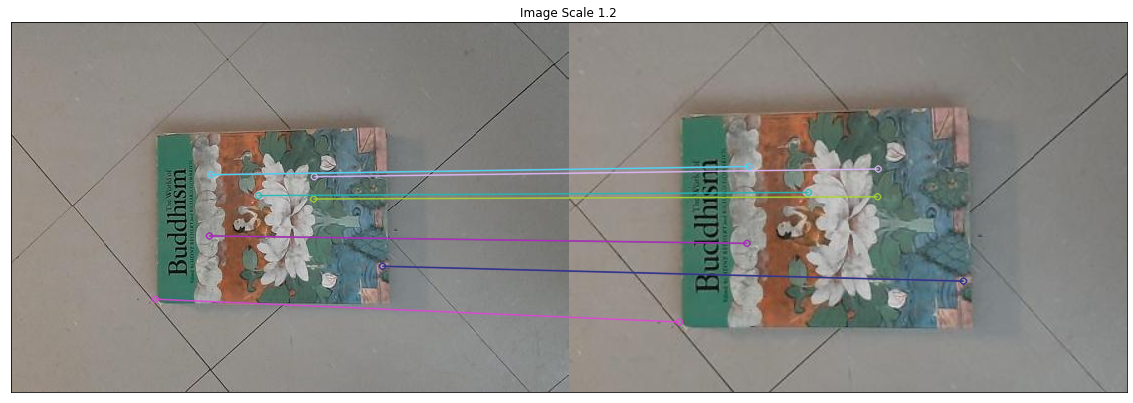

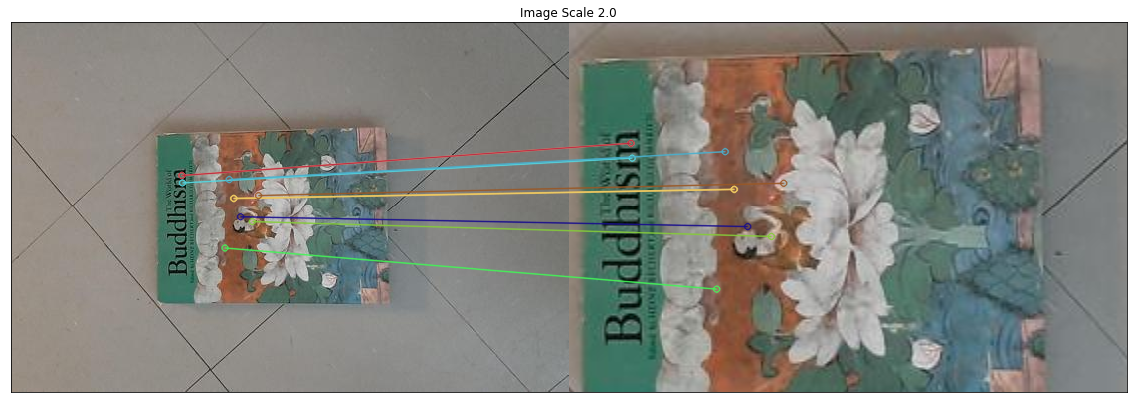

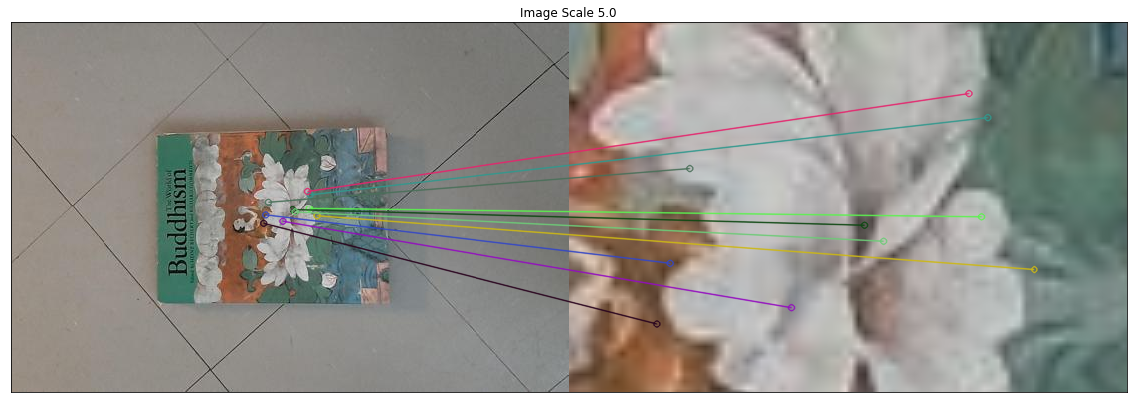

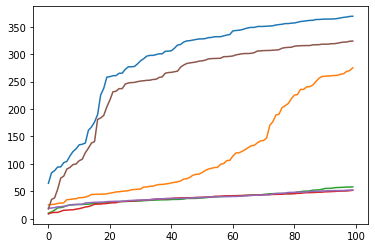

In [10]:
# load the image 
img1 = cv2.imread("book.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

height, width = img1.shape[0:2] # image size


# 1.1.2 rotation marix around the center pixel, scaling images by factor of 0.2,.05.08,1.25,2.0,5.0
M2 = cv2.getRotationMatrix2D((width/2,height/2),0,0.2)
img2 = cv2.warpAffine(img1,M2,(width,height))
M3 = cv2.getRotationMatrix2D((width/2,height/2),0,0.5)
img3 = cv2.warpAffine(img1,M3,(width,height))
M4 = cv2.getRotationMatrix2D((width/2,height/2),0,0.8)
img4 = cv2.warpAffine(img1,M4,(width,height))
M5 = cv2.getRotationMatrix2D((width/2,height/2),0,1.25)
img5 = cv2.warpAffine(img1,M5,(width,height))
M6 = cv2.getRotationMatrix2D((width/2,height/2),0,2.0)
img6 = cv2.warpAffine(img1,M6,(width,height))
M7 = cv2.getRotationMatrix2D((width/2,height/2),0,7)
img7 = cv2.warpAffine(img1,M7,(width,height))


# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# 1.1.1 Compute the keypoints/descriptors 
keypoints1,descriptors1 = sift.detectAndCompute(img1,None) 

# 1.1.3 Compute the keypoints/descriptors 
keypoints2,descriptors2 = sift.detectAndCompute(img2,None)
keypoints3,descriptors3 = sift.detectAndCompute(img3,None)
keypoints4,descriptors4 = sift.detectAndCompute(img4,None)
keypoints5,descriptors5 = sift.detectAndCompute(img5,None)
keypoints6,descriptors6 = sift.detectAndCompute(img6,None)
keypoints7,descriptors7 = sift.detectAndCompute(img7,None)

print("Number of keypoint normal image: " + str(len(keypoints1)))
print("Number of keypoint scale 0.2: " + str(len(keypoints2)))
print("Number of keypoint scale 0.5: " + str(len(keypoints3)))
print("Number of keypoint scale 0.8: " + str(len(keypoints4)))
print("Number of keypoint scale 1.25: " + str(len(keypoints5)))
print("Number of keypoint scale 2.0: " + str(len(keypoints6)))
print("Number of keypoint scale 5.0: " + str(len(keypoints7)))

# 1.1.4 Matching keypoints using BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

matches1 = bf.match(descriptors1,descriptors2) #query image, train image
matches2 = bf.match(descriptors1,descriptors3)
matches3 = bf.match(descriptors1,descriptors4)
matches4 = bf.match(descriptors1,descriptors5)
matches5 = bf.match(descriptors1,descriptors6)
matches6 = bf.match(descriptors1,descriptors7)


# 1.1.5 Sort matching keypooints in the order of their distance.
matches1 = sorted(matches1, key = lambda x:x.distance)
matches2 = sorted(matches2, key = lambda x:x.distance)
matches3 = sorted(matches3, key = lambda x:x.distance)
matches4 = sorted(matches4, key = lambda x:x.distance)
matches5 = sorted(matches5, key = lambda x:x.distance)
matches6 = sorted(matches6, key = lambda x:x.distance)


# 1.1.6 Displaying top ten matched keypoints for each pair of reference image and a transformed image.
imgs1 = cv2.drawMatches(img1,keypoints1,img2,keypoints2, matches1[:10], None, flags=2)
imgs2 = cv2.drawMatches(img1,keypoints1,img3,keypoints3, matches2[:10], None, flags=2)
imgs3 = cv2.drawMatches(img1,keypoints1,img4,keypoints4, matches3[:10], None, flags=2)
imgs4 = cv2.drawMatches(img1,keypoints1,img5,keypoints5, matches4[:10], None, flags=2)
imgs5 = cv2.drawMatches(img1,keypoints1,img6,keypoints6, matches5[:10], None, flags=2)
imgs6 = cv2.drawMatches(img1,keypoints1,img7,keypoints7, matches6[:10], None, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(imgs1)
plt.title("Image Scale 0.2"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs2)
plt.title("Image Scale 0.5"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs3)
plt.title("Image Scale 0.5"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs4)
plt.title("Image Scale 1.2"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs5)
plt.title("Image Scale 2.0"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs6)
plt.title("Image Scale 5.0"), plt.xticks([]), plt.yticks([])
plt.show()

# 1.1.7 Plotting the matching distance for top 100 matched keypoints.
dist1 = []
dist2 = []
dist3 = []
dist4 = []
dist5 = []
dist6 = []

for x in (matches1[:100]) :
    dist1.append(x.distance)        
for x in (matches2[:100]) :
    dist2.append(x.distance)   
for x in (matches3[:100]) :
    dist3.append(x.distance)    
for x in (matches4[:100]) :
    dist4.append(x.distance) 
for x in (matches5[:100]) :
    dist5.append(x.distance)
for x in (matches6[:100]) :
    dist6.append(x.distance) 
    
plt.plot(dist1)
plt.plot(dist2)
plt.plot(dist3)
plt.plot(dist4)
plt.plot(dist5)
plt.plot(dist6)
plt.show()


It's an exponential curve for each seperate scaling factors. When the number of keypoints increase, the distance also increases. 

With the effect of increasing scaling factors when it is less than 1, the distance between the matching keypoints DECREASES. From example from 0.2 to 0.5 the max distance decreases from 350 to 250. However, if we increase the scaling factor starting from 1 to anything above(5 in our case), the distance between the keypoint INCREASES. With increased scaling factors, more parts of the image are within the window, visible and detected. As a result, the matching keypoints detected have more distance in between them

# 1.2 Invariance under Rotation

Number of keypoint normal image: 385
Number of keypoint scale 0.2: 439
Number of keypoint scale 0.5: 446
Number of keypoint scale 0.8: 477
Number of keypoint scale 1.25: 446
Number of keypoint scale 2.0: 456
Number of keypoint scale 5.0: 400


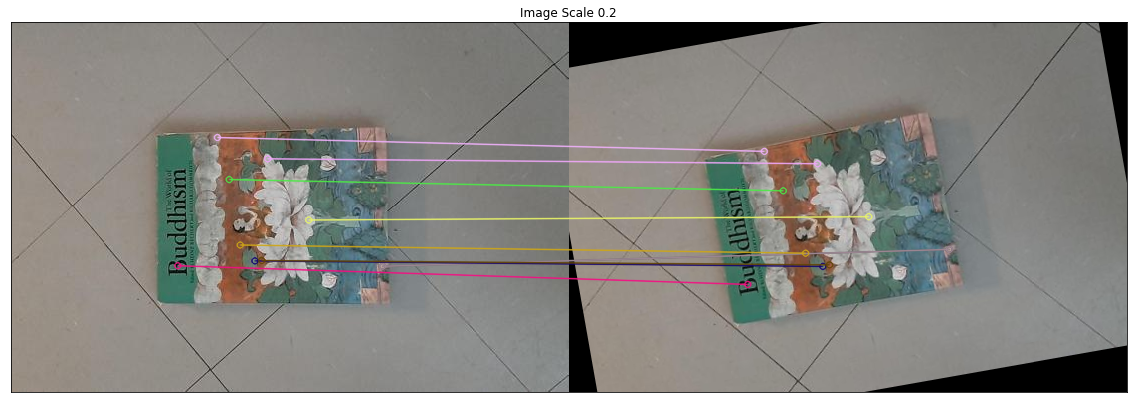

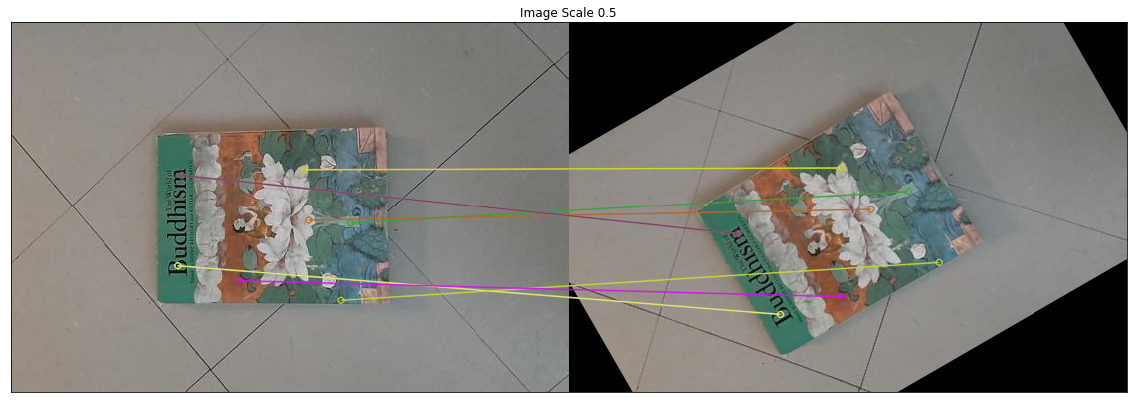

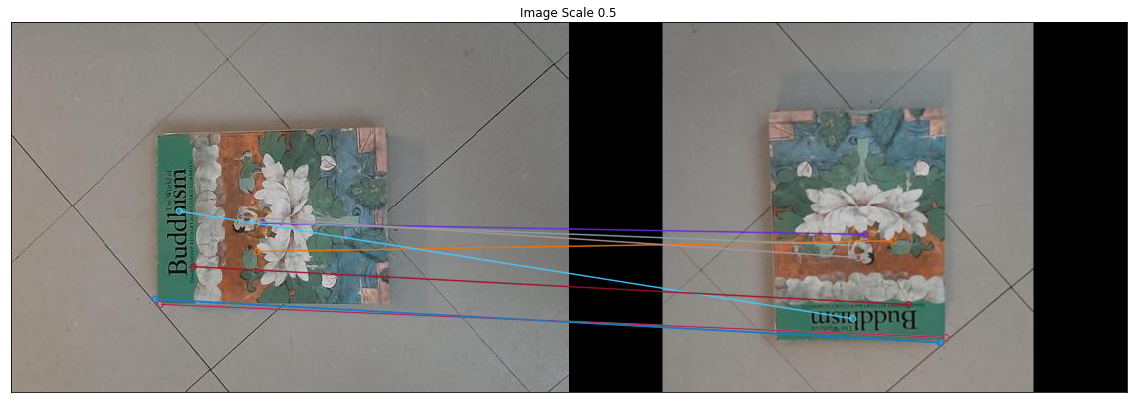

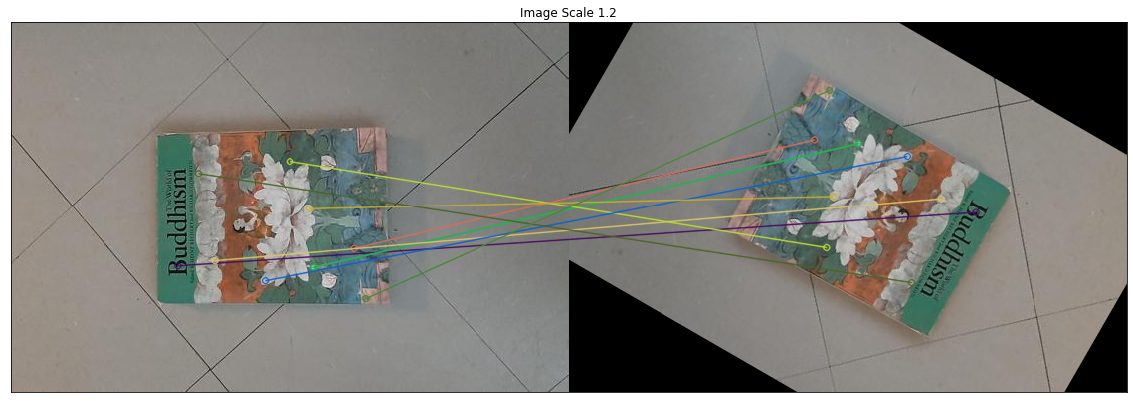

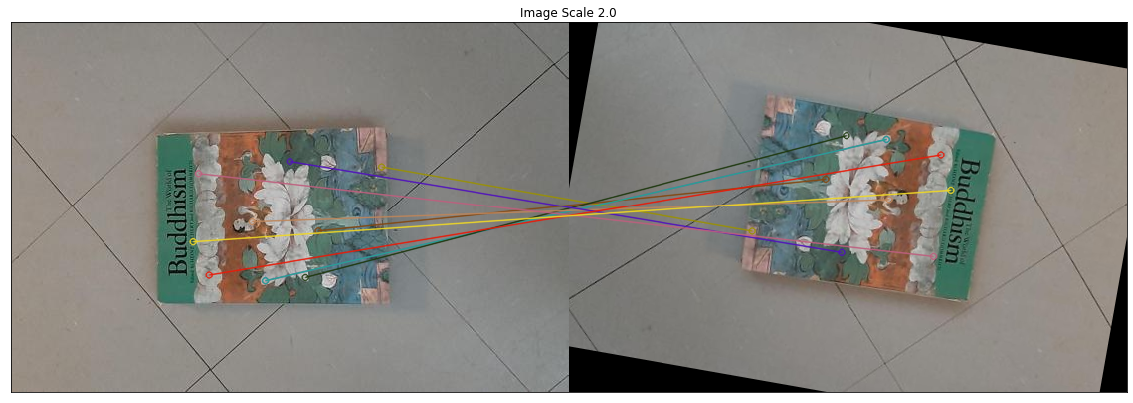

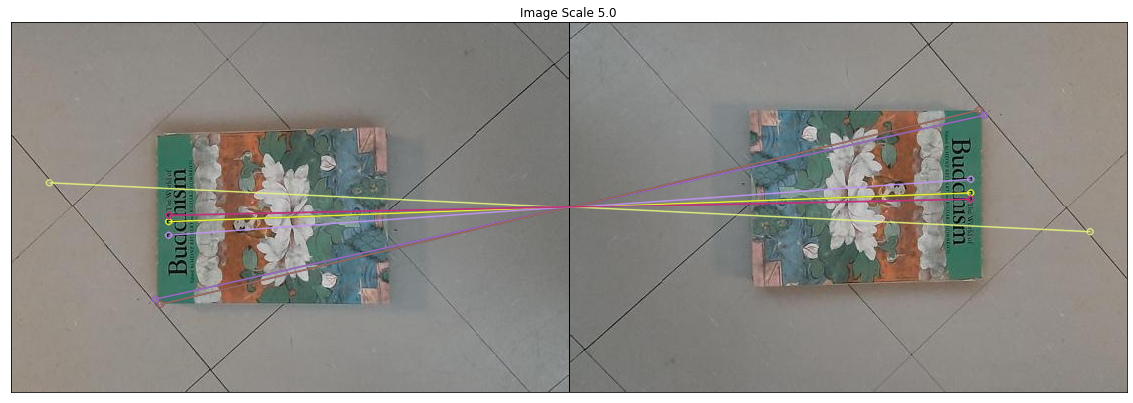

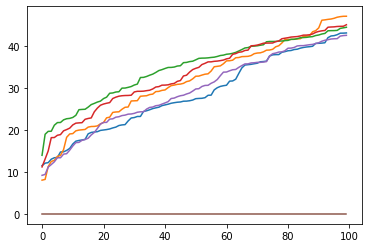

In [11]:
# load the image 
img1 = cv2.imread("book.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

height, width = img1.shape[0:2] # image size


# 1.2.2 rotation marix around the center pixel, rotating images by  10, 30, 90, 150, 170, 180
M2 = cv2.getRotationMatrix2D((width/2,height/2),10,1)
img2 = cv2.warpAffine(img1,M2,(width,height))
M3 = cv2.getRotationMatrix2D((width/2,height/2),30,1)
img3 = cv2.warpAffine(img1,M3,(width,height))
M4 = cv2.getRotationMatrix2D((width/2,height/2),90,1)
img4 = cv2.warpAffine(img1,M4,(width,height))
M5 = cv2.getRotationMatrix2D((width/2,height/2),150,1)
img5 = cv2.warpAffine(img1,M5,(width,height))
M6 = cv2.getRotationMatrix2D((width/2,height/2),170,1)
img6 = cv2.warpAffine(img1,M6,(width,height))
M7 = cv2.getRotationMatrix2D((width/2,height/2),180,1)
img7 = cv2.warpAffine(img1,M7,(width,height))


# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# 1.2.1 Compute the keypoints/descriptors 
keypoints1,descriptors1 = sift.detectAndCompute(img1,None) 

# 1.2.3 Compute the keypoints/descriptors 
keypoints2,descriptors2 = sift.detectAndCompute(img2,None)
keypoints3,descriptors3 = sift.detectAndCompute(img3,None)
keypoints4,descriptors4 = sift.detectAndCompute(img4,None)
keypoints5,descriptors5 = sift.detectAndCompute(img5,None)
keypoints6,descriptors6 = sift.detectAndCompute(img6,None)
keypoints7,descriptors7 = sift.detectAndCompute(img7,None)

print("Number of keypoint normal image: " + str(len(keypoints1)))
print("Number of keypoint scale 0.2: " + str(len(keypoints2)))
print("Number of keypoint scale 0.5: " + str(len(keypoints3)))
print("Number of keypoint scale 0.8: " + str(len(keypoints4)))
print("Number of keypoint scale 1.25: " + str(len(keypoints5)))
print("Number of keypoint scale 2.0: " + str(len(keypoints6)))
print("Number of keypoint scale 5.0: " + str(len(keypoints7)))

# 1.2.4 Matching keypoints using BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

matches1 = bf.match(descriptors1,descriptors2) #query image, train image
matches2 = bf.match(descriptors1,descriptors3)
matches3 = bf.match(descriptors1,descriptors4)
matches4 = bf.match(descriptors1,descriptors5)
matches5 = bf.match(descriptors1,descriptors6)
matches6 = bf.match(descriptors1,descriptors7)


# 1.2.5 Sort matching keypooints in the order of their distance.
matches1 = sorted(matches1, key = lambda x:x.distance)
matches2 = sorted(matches2, key = lambda x:x.distance)
matches3 = sorted(matches3, key = lambda x:x.distance)
matches4 = sorted(matches4, key = lambda x:x.distance)
matches5 = sorted(matches5, key = lambda x:x.distance)
matches6 = sorted(matches6, key = lambda x:x.distance)


# 1.2.6 Displaying top ten matched keypoints for each pair of reference image and a transformed image.
imgs1 = cv2.drawMatches(img1,keypoints1,img2,keypoints2, matches1[:10], None, flags=2)
imgs2 = cv2.drawMatches(img1,keypoints1,img3,keypoints3, matches2[:10], None, flags=2)
imgs3 = cv2.drawMatches(img1,keypoints1,img4,keypoints4, matches3[:10], None, flags=2)
imgs4 = cv2.drawMatches(img1,keypoints1,img5,keypoints5, matches4[:10], None, flags=2)
imgs5 = cv2.drawMatches(img1,keypoints1,img6,keypoints6, matches5[:10], None, flags=2)
imgs6 = cv2.drawMatches(img1,keypoints1,img7,keypoints7, matches6[:10], None, flags=2)

plt.figure(figsize=(20,20))
plt.imshow(imgs1)
plt.title("Image Scale 0.2"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs2)
plt.title("Image Scale 0.5"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs3)
plt.title("Image Scale 0.5"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs4)
plt.title("Image Scale 1.2"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs5)
plt.title("Image Scale 2.0"), plt.xticks([]), plt.yticks([])
plt.show()
plt.figure(figsize=(20,20))
plt.imshow(imgs6)
plt.title("Image Scale 5.0"), plt.xticks([]), plt.yticks([])
plt.show()

# 1.2.7 Plotting the matching distance for top 100 matched keypoints.
dist1 = []
dist2 = []
dist3 = []
dist4 = []
dist5 = []
dist6 = []

for x in (matches1[:100]) :
    dist1.append(x.distance)

for x in (matches2[:100]) :
    dist2.append(x.distance)

for x in (matches3[:100]) :
    dist3.append(x.distance) 
    
for x in (matches4[:100]) :
    dist4.append(x.distance) 
for x in (matches5[:100]) :
    dist5.append(x.distance)
for x in (matches6[:100]) :
    dist6.append(x.distance) 
    
plt.plot(dist1)
plt.plot(dist2)
plt.plot(dist3)
plt.plot(dist4)
plt.plot(dist5)
plt.plot(dist6)
plt.show()



All the curves are exponential, where distance between the matching keypoints increases with increased number of matching keypoints, except for a rotation of 180 degree where the distance remains the same. The maximum distance for all other rotations caps off at 45. There is not much significant difference when increasing the angle of rotation. This is due to the fact that even though it is rotated all the parts of the image are still within the window, visible and similar keypoints can be detected.